In [77]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# example = ["8S95"]
csv_dir = Path("distributions")

gt_data = pd.read_csv(csv_dir / "gt_8S95.csv", names=['pair', 'count_gt'])
grapha_data = pd.read_csv(csv_dir / "graphafold_casp_8S95.csv", names=['pair', 'count_grapha'])
ufold_data = pd.read_csv(csv_dir / "ufold_8S95.csv", names=['pair', 'count_ufold'])
spotrna_data = pd.read_csv(csv_dir / "spotrna_8S95.csv", names=['pair', 'count_spotrna'])
sincfold_data = pd.read_csv(csv_dir / "sincfold_8S95.csv", names=['pair', 'count_sincfold'])
# join dfs on pair column, fill missing values with 0
# df = pd.merge(gt_data, grapha_data, on='pair', suffixes=('_gt', '_grapha'), how='outer').fillna(0)
df = pd.merge(gt_data, grapha_data, on='pair', suffixes=("_gt", "_grapha"), how='outer').fillna(0)
df = pd.merge(df, ufold_data, on='pair', suffixes=('', "_ufold"), how="outer").fillna(0)
df = pd.merge(df, spotrna_data, on='pair', suffixes=('', "_spotrna"), how='outer').fillna(0)
df = pd.merge(df, sincfold_data, on='pair', suffixes=('', "_sincfold"), how='outer').fillna(0)

In [78]:
df

,pair,count_gt,count_grapha,count_ufold,count_spotrna,count_sincfold
0,A-A,2,2.0,0.0,1.0,0.0
1,A-C,1,3.0,0.0,0.0,0.0
2,A-G,2,2.0,0.0,1.0,0.0
3,A-U,4,4.0,0.0,0.0,0.0
4,C-C,1,1.0,0.0,0.0,0.0
5,C-G,2,2.0,0.0,0.0,0.0
6,C-U,1,1.0,0.0,0.0,0.0
7,G-G,2,0.0,0.0,0.0,0.0
8,G-U,2,3.0,5.0,1.0,3.0
9,U-U,1,2.0,0.0,0.0,0.0


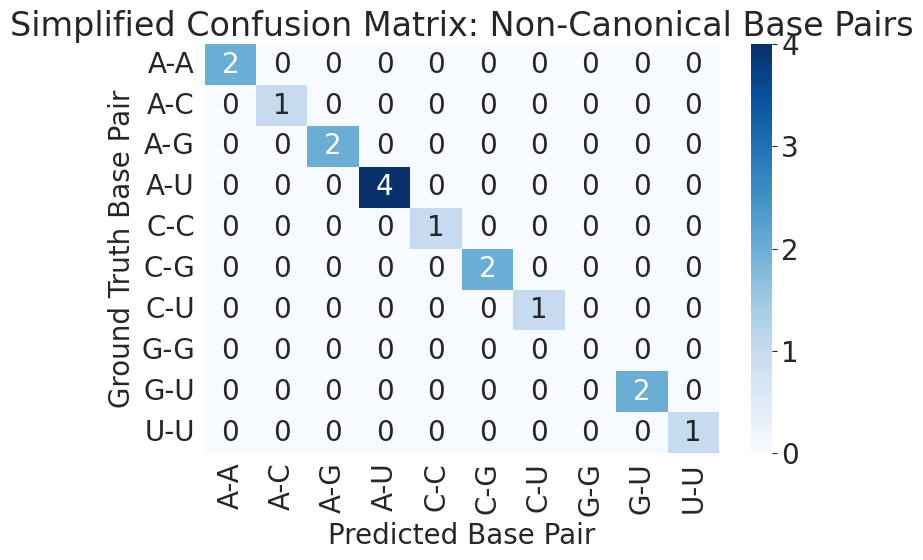

In [79]:
# Create a matrix (GT as rows, Pred as columns)
all_pairs = sorted(df["pair"].unique())
conf_matrix = pd.DataFrame(0, index=all_pairs, columns=all_pairs)

# Fill diagonal values as min(count_gt, count_pred)
for _, row in df.iterrows():
    pair = row["pair"]
    match = min(row["count_gt"], row["count_grapha"])
    conf_matrix.loc[pair, pair] = match

# Fill off-diagonal (missed or excess) if desired – here we just leave them zero
# You could extend this with real misclassification info if available

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Simplified Confusion Matrix: Non-Canonical Base Pairs")
plt.xlabel("Predicted Base Pair")
plt.ylabel("Ground Truth Base Pair")
plt.tight_layout()
plt.show()

In [80]:
df

,pair,count_gt,count_grapha,count_ufold,count_spotrna,count_sincfold
0,A-A,2,2.0,0.0,1.0,0.0
1,A-C,1,3.0,0.0,0.0,0.0
2,A-G,2,2.0,0.0,1.0,0.0
3,A-U,4,4.0,0.0,0.0,0.0
4,C-C,1,1.0,0.0,0.0,0.0
5,C-G,2,2.0,0.0,0.0,0.0
6,C-U,1,1.0,0.0,0.0,0.0
7,G-G,2,0.0,0.0,0.0,0.0
8,G-U,2,3.0,5.0,1.0,3.0
9,U-U,1,2.0,0.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

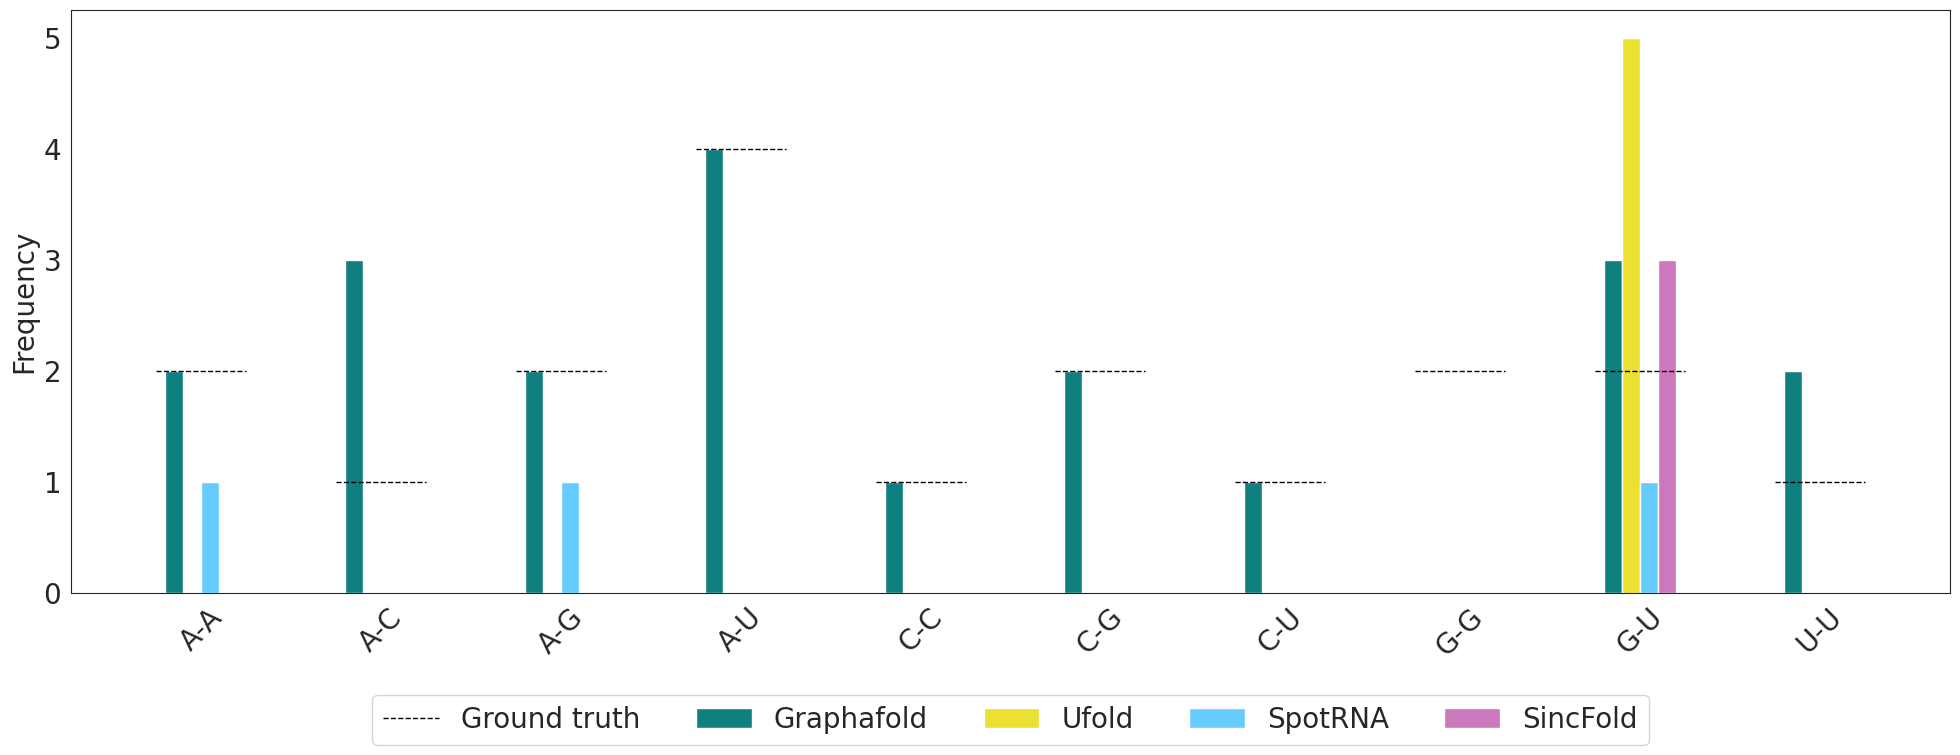

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
colors = sns.color_palette("colorblind")
plt.rcParams.update({'font.size': 20})
plt.clf()

x = range(len(df))
plt.figure(figsize=(20, 8))
width = 0.1

# Plot prediction bars
plt.bar([i + width for i in x], df['count_grapha'], width=width, label='Graphafold', color="#107F80")
plt.bar([i + 2 * width for i in x], df['count_ufold'], width=width, label='Ufold', color=colors[-2])
plt.bar([i + 3 * width for i in x], df['count_spotrna'], width=width, label='SpotRNA', color="#66CCFE")
plt.bar([i + 4 * width for i in x], df['count_sincfold'], width=width, label='SincFold', color=colors[4])

# Draw a horizontal line over each group for ground truth
for i in x:
    x_start = i       # start of first bar
    x_end = i + 4 * width + width  # end of last bar + small gap
    y = df['count_gt'][i]
    plt.hlines(y, x_start, x_end, colors='black', linewidth=1, label='Ground truth' if i == 0 else "", linestyle='--')

# Set x-ticks to center under bar groups
center_x = [i + 2.5 * width for i in x]


# Ticks, labels, and legend
plt.xticks(center_x, df['pair'], rotation=45)
plt.ylabel('Frequency')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

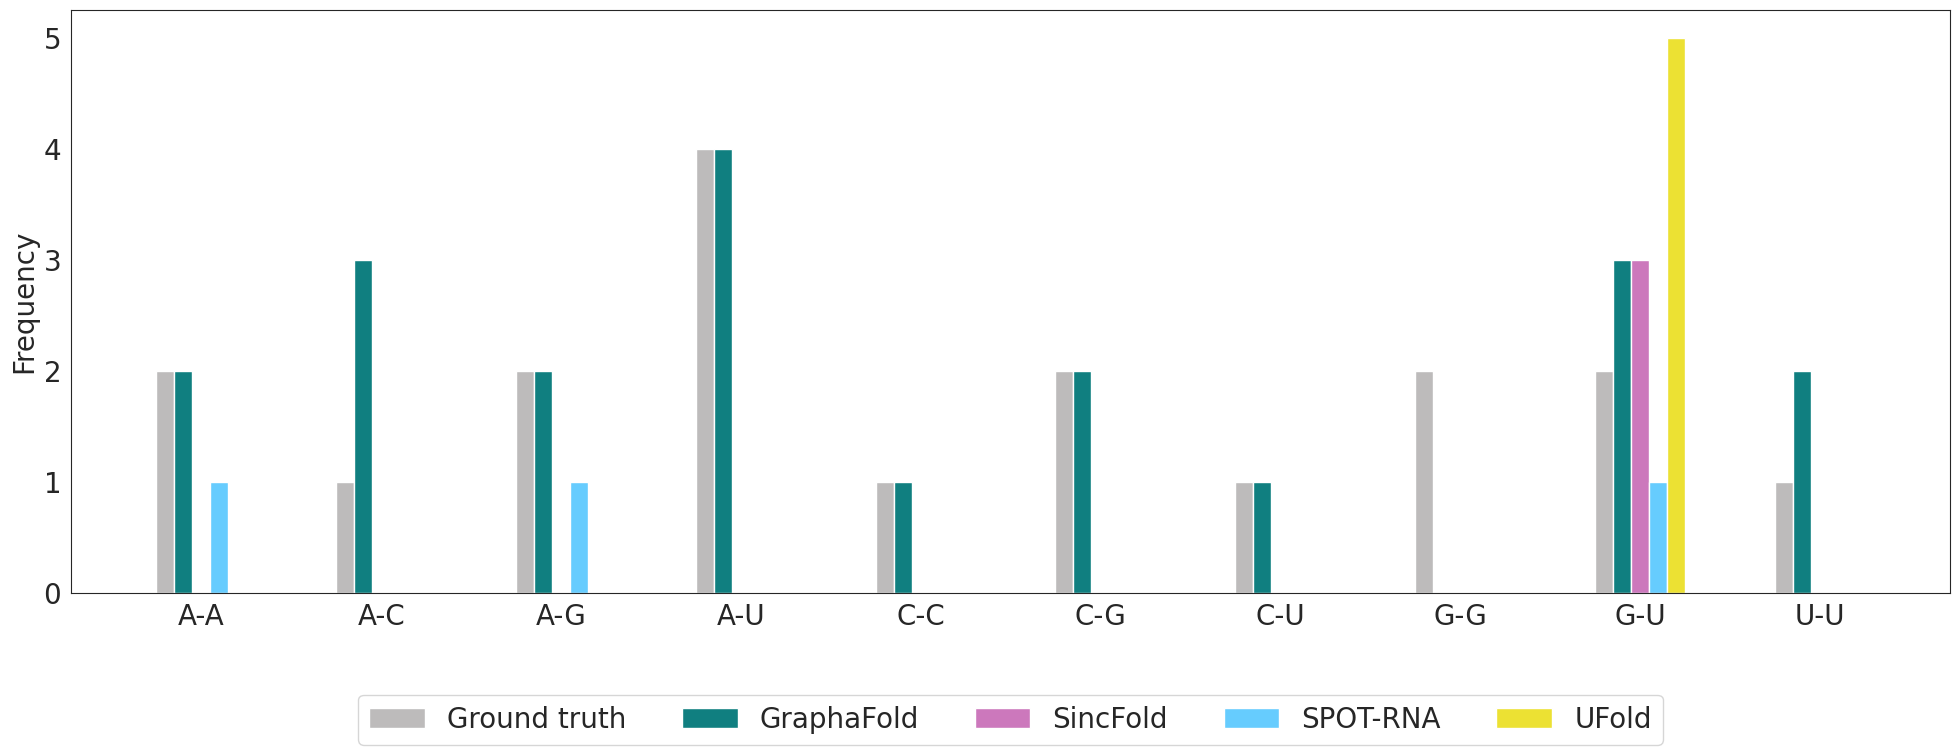

In [86]:
sns.set_style("white")
colors = sns.color_palette("colorblind")
# increas font size
plt.rcParams.update({'font.size': 20})
plt.clf()

x = range(len(df))
plt.figure(figsize=(20, 8))
width = 0.1
# add upper bound line on top of each bar

plt.bar(x, df['count_gt'], width=width, label='Ground truth', color="#bdbbbb") # colors[2]
plt.bar([i + width for i in x], df['count_grapha'], width=width, label='GraphaFold', color="#107F80")
plt.bar([i + 2 * width for i in x], df['count_sincfold'], width=width, label='SincFold', color=colors[4])
plt.bar([i + 3 * width for i in x], df['count_spotrna'], width=width, label='SPOT-RNA', color="#66CCFE")
plt.bar([i + 4 * width for i in x], df['count_ufold'], width=width, label='UFold', color=colors[-2])
plt.xticks([i + 2 * width for i in x], df['pair'], rotation=0)
plt.ylabel('Frequency')
# plt.title('Non-Canonical Base Pair Frequencies: Ground Truth vs Prediction')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.savefig("8S95_distr.png", dpi=300)

In [6]:
# zielony: #107F80 
# niebieski: #66CCFE 
# różowy: #FF0066

### Measure F1 for each specific pair type

In [7]:
methods = ["graphafold_casp", "spotrna", "sincfold", "ufold"]
cols = ["f1_grapha", "f1_spotrna", "f1_sincfold", "f1_ufold"]
df_all = pd.DataFrame(columns=cols)
for method, col in zip(methods, cols, strict=True):
    # read csv file
    dist_file = Path(f"distributions/{method}_all.csv")
    df = pd.read_csv(dist_file)
    df = df.rename(columns={"Unnamed: 0": "pair"})
    # compute f1 socre using tp, fn and fp columns. Formula: 2 * tp / (2 * tp + fn + fp)
    df_all[col] = 2 * df["tp"] / (2 * df["tp"] + df["fn"] + df["fp"])
    print(f"F1 score for {method}: {df_all[col].mean()}")

df_all

F1 score for graphafold_casp: 0.7152585765488991
F1 score for spotrna: 0.12314415980744582
F1 score for sincfold: 0.006593406593406593
F1 score for ufold: 0.016666666666666666


,f1_grapha,f1_spotrna,f1_sincfold,f1_ufold
0,0.833333,0.275862,0.000000,0.000000
1,0.606061,0.000000,0.000000,0.000000
2,0.612903,0.250000,0.000000,0.000000
3,0.698413,0.000000,0.000000,0.000000
4,0.909091,0.000000,0.000000,0.000000
5,0.571429,0.000000,0.000000,0.000000
6,0.428571,0.000000,0.000000,0.000000
7,0.793651,0.162162,0.000000,0.000000
8,0.880952,0.352941,0.065934,0.166667
9,0.818182,0.190476,0.000000,0.000000


##### Plot of all distributions

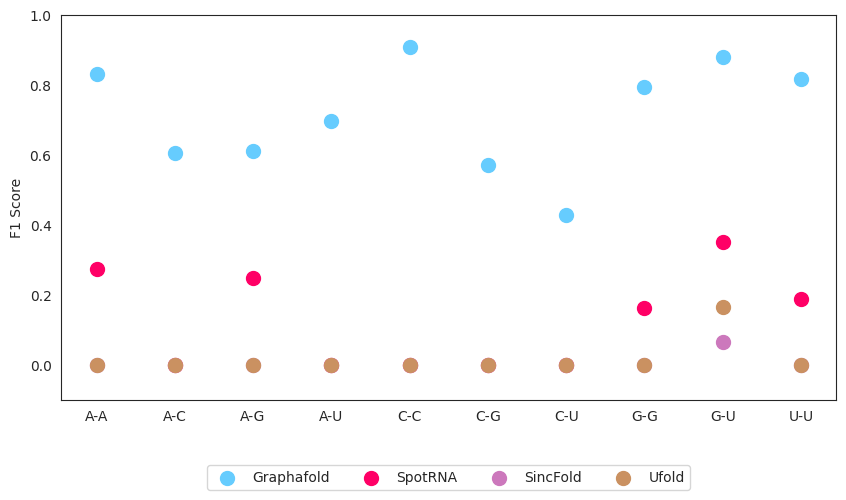

In [8]:
# bubble plot of df_all as y axis and df['pair'] as x axis
plt.figure(figsize=(10, 5))
plt.scatter(df['pair'], df_all['f1_grapha'], s=100, label='Graphafold', color="#66CCFE")
plt.scatter(df['pair'], df_all['f1_spotrna'], s=100, label='SpotRNA', color="#FF0066")
plt.scatter(df['pair'], df_all['f1_sincfold'], s=100, label='SincFold', color=colors[4])
plt.scatter(df['pair'], df_all['f1_ufold'], s=100, label='Ufold', color=colors[-5])
# plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.ylim(-0.1, 1)
# show legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

<Figure size 640x480 with 0 Axes>

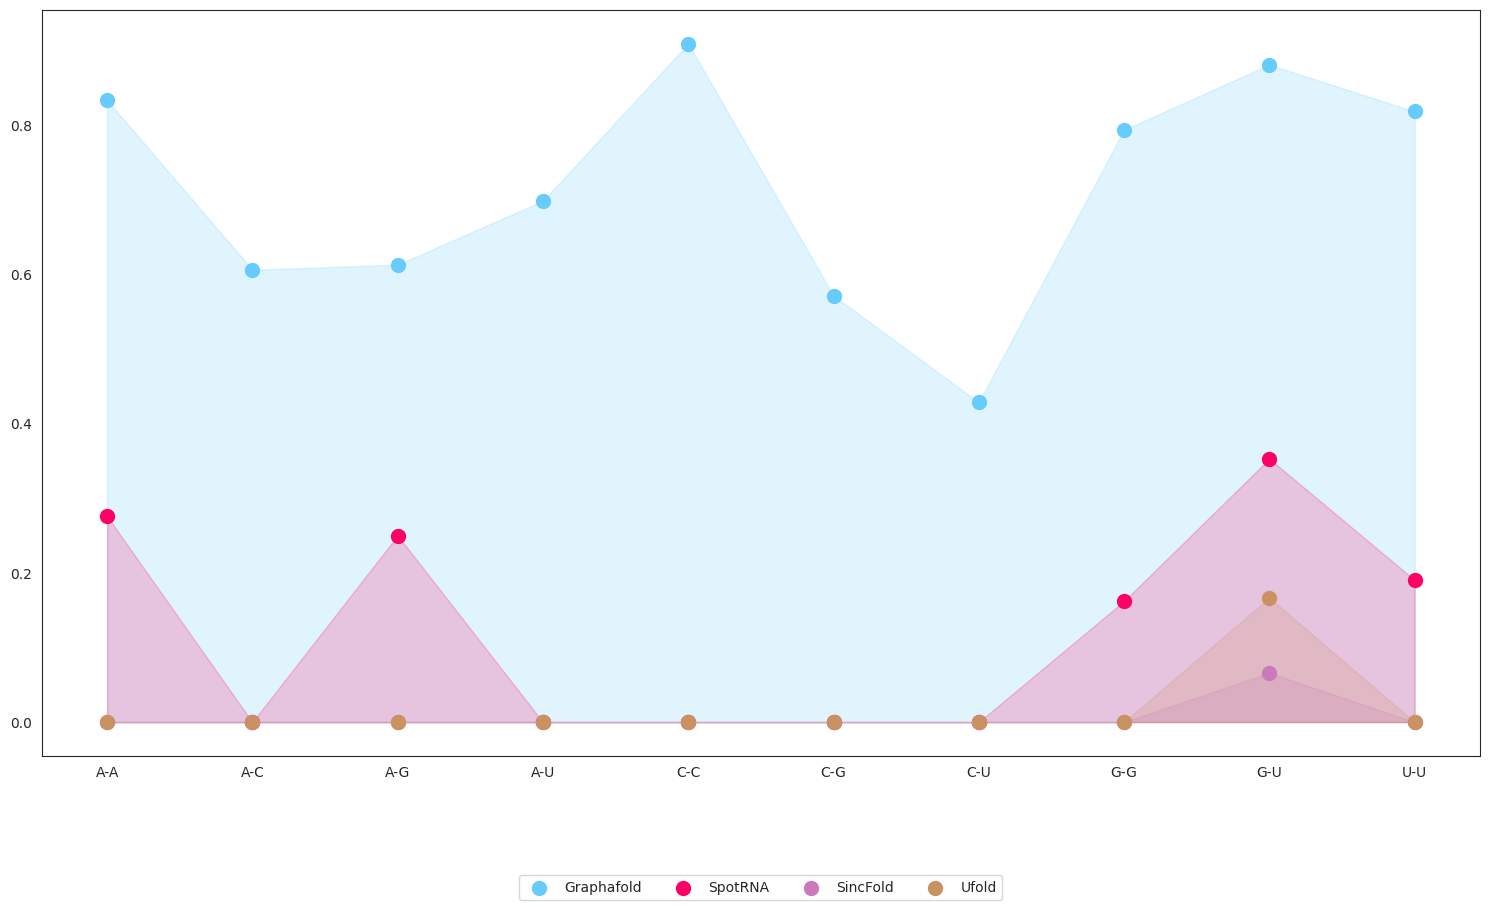

In [9]:
# type of plot, where are dots (like scatter) and lines (like line plot). The area below the line is filled with color
# reset plot
plt.clf()
plt.figure(figsize=(15, 8))
plt.fill_between(df['pair'], df_all['f1_grapha'], color="#66CCFE", alpha=0.2)
plt.fill_between(df['pair'], df_all['f1_spotrna'], color="#FF0066", alpha=0.2)
plt.fill_between(df['pair'], df_all['f1_sincfold'], color=colors[4], alpha=0.2)
plt.fill_between(df['pair'], df_all['f1_ufold'], color=colors[-5], alpha=0.2)
plt.scatter(df['pair'], df_all['f1_grapha'], s=100, label='Graphafold', color="#66CCFE")
plt.scatter(df['pair'], df_all['f1_spotrna'], s=100, label='SpotRNA', color="#FF0066")
plt.scatter(df['pair'], df_all['f1_sincfold'], s=100, label='SincFold', color=colors[4])
plt.scatter(df['pair'], df_all['f1_ufold'], s=100, label='Ufold', color=colors[-5])

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

<Figure size 640x480 with 0 Axes>

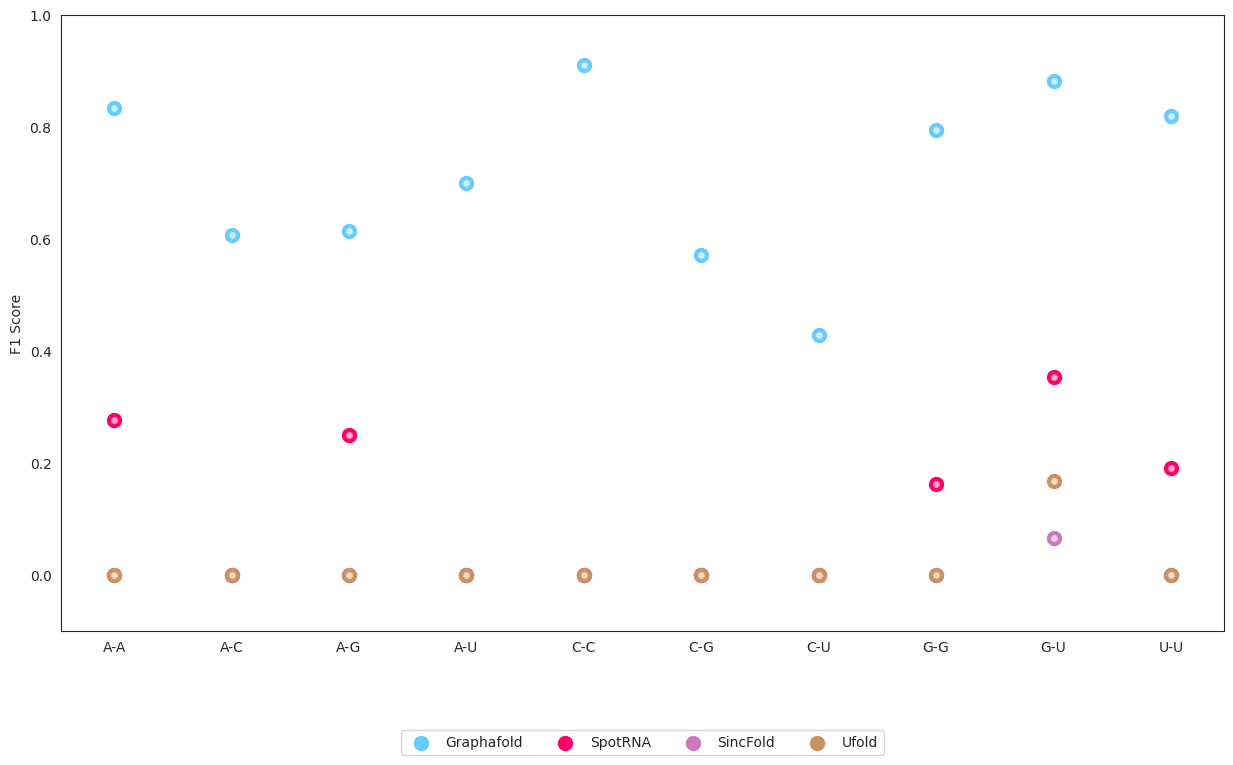

In [10]:
# make scatter plot, but add white reflexion on the points to make them look like bubbles
plt.clf()
def add_glow_effect(ax, x, y, color, label):
    # Overlay a smaller scatter plot for the actual data points
    ax.scatter(x, y, s=100, color=color, linewidth=1, label=label)
    # Create a scatter plot with a larger size for the glow effect
    ax.scatter(x, y, s=10, color="white", alpha=0.5, edgecolors=None, linewidth=2)
    

plt.figure(figsize=(15, 8))
# plt.scatter(df['pair'], df_all['f1_grapha'], s=100, label='Graphafold', color="#66CCFE")
# plt.scatter(df['pair'], df_all['f1_spotrna'], s=100, label='SpotRNA', color="#FF0066")
# plt.scatter(df['pair'], df_all['f1_sincfold'], s=100, label='SincFold', color=colors[4])
# plt.scatter(df['pair'], df_all['f1_ufold'], s=100, label='Ufold', color=colors[-5])
# add glow effect to white points
add_glow_effect(plt.gca(), df['pair'], df_all['f1_grapha'], "#66CCFE", label='Graphafold')
add_glow_effect(plt.gca(), df['pair'], df_all['f1_spotrna'], "#FF0066", label='SpotRNA')
add_glow_effect(plt.gca(), df['pair'], df_all['f1_sincfold'], colors[4], label='SincFold')
add_glow_effect(plt.gca(), df['pair'], df_all['f1_ufold'], colors[-5], label='Ufold')
# plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.ylim(-0.1, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

<Figure size 640x480 with 0 Axes>

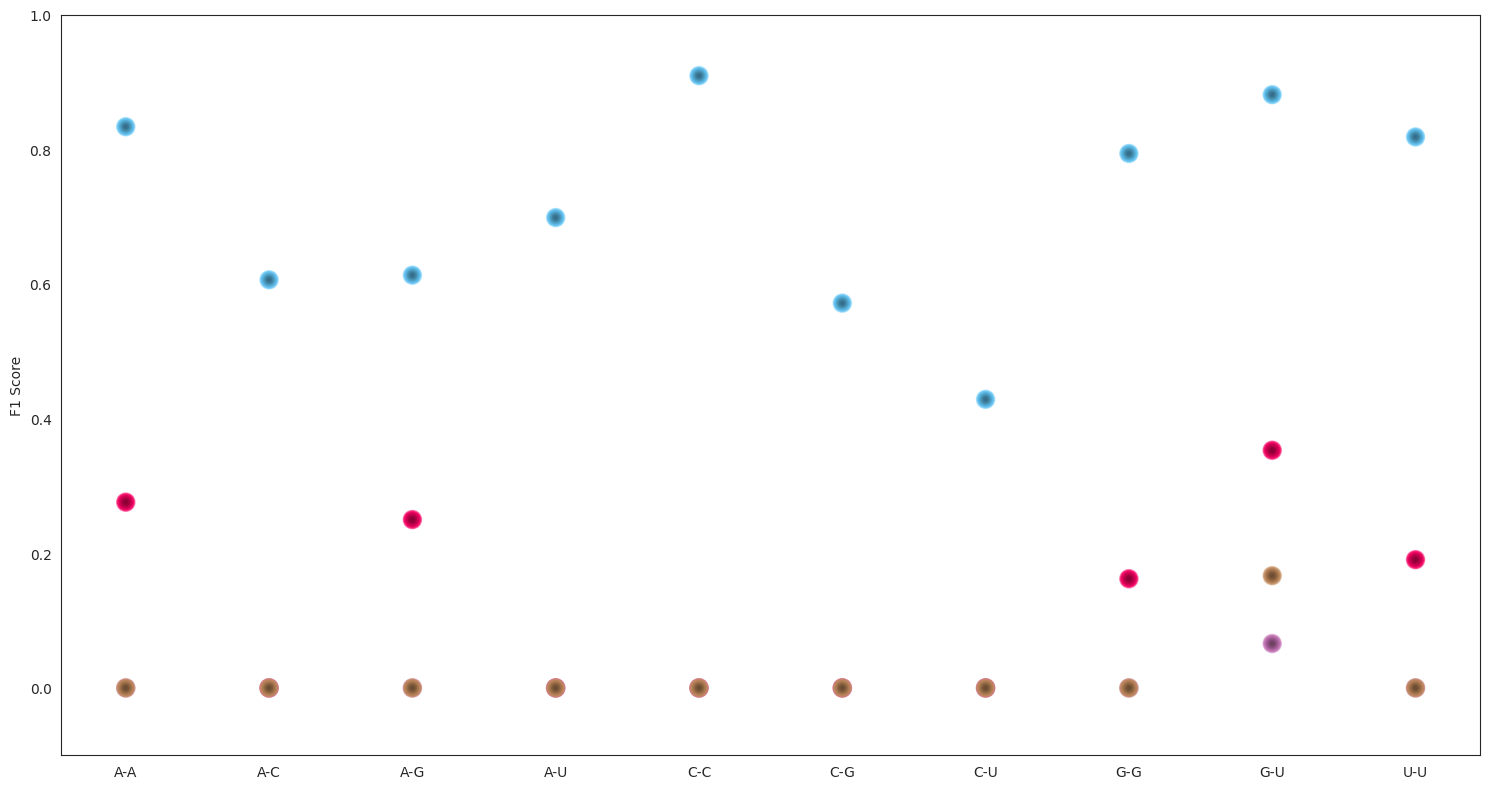

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def radial_gradient(x, y, base_color, ax, base_sizes):
    rgb = mcolors.to_rgb(base_color)

    # Create gradient effect with logarithmic fading
    num_layers = 50  # More layers for smoother gradient
    for i in range(num_layers):
        # Normalize layer index to [0, 1]
        t = i / (num_layers - 1)

        # Logarithmic decay for size (outer layers larger, inner smaller)
        layer_size = base_sizes * (1 - np.log1p(t * 10) / np.log1p(10))  # Steeper log decay
        # Logarithmic alpha (outer layers faint, inner layers solid)
        layer_alpha = 0.05 + 0.3 * (1 - np.log1p(t * 8) / np.log1p(8))  # Stronger contrast

        # Slight color variation (darker to lighter within same hue)
        color_intensity = 0.4 + 0.6 * (1 - t)  # Brighter center, darker edges
        layer_color = [c * color_intensity for c in rgb]

        # Plot layer
        ax.scatter(x, y, s=layer_size, c=[layer_color], alpha=layer_alpha, edgecolors='none')
plt.clf()
plt.figure(figsize=(15, 8))
base_sizes = 200
radial_gradient(df['pair'], df_all['f1_grapha'], "#66CCFE", plt.gca(), base_sizes)
radial_gradient(df['pair'], df_all['f1_spotrna'], "#FF0066", plt.gca(), base_sizes)
radial_gradient(df['pair'], df_all['f1_sincfold'], colors[4], plt.gca(), base_sizes)
radial_gradient(df['pair'], df_all['f1_ufold'], colors[-5], plt.gca(), base_sizes)
plt.ylabel('F1 Score')
plt.ylim(-0.1, 1)
plt.tight_layout()


Bar plot instead of scatter

<Figure size 640x480 with 0 Axes>

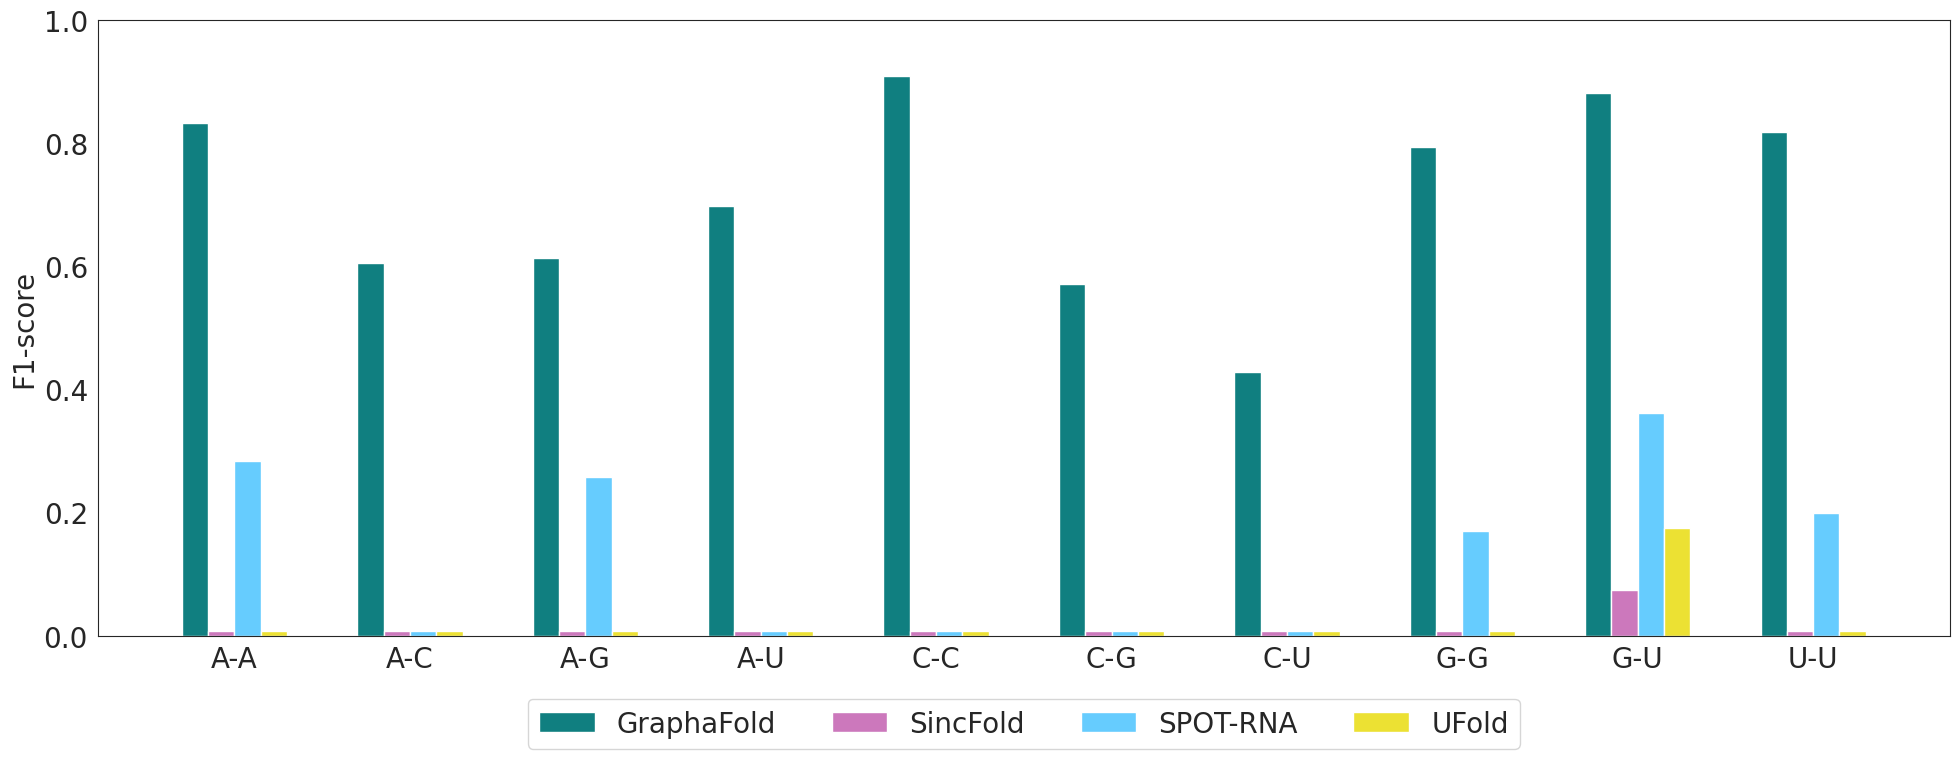

In [85]:
sns.set_style("white")
colors = sns.color_palette("colorblind")
# increas font size
plt.rcParams.update({'font.size': 20})
plt.clf()

plt.figure(figsize=(20, 8))
x = np.arange(len(df['pair']))
width = 0.15
eps = 0.008
plt.bar([i + width for i in x], df_all['f1_grapha'], width=width, label='GraphaFold', color="#107F80")
plt.bar([i + 2 * width for i in x], df_all['f1_sincfold']+eps, width=width, label='SincFold', color=colors[4])
plt.bar([i + 3 * width for i in x], df_all['f1_spotrna']+eps, width=width, label='SPOT-RNA', color="#66CCFE") # #FF0066
plt.bar([i + 4 * width for i in x], df_all['f1_ufold']+eps, width=width, label='UFold', color=colors[-2])
plt.xticks([i + 2.5 * width for i in x], df['pair'], rotation=0)
plt.ylabel('F1-score')
plt.ylim(0, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)
plt.tight_layout()
plt.savefig("f1_score.png", dpi=300)

#### Plot of graphafold results only

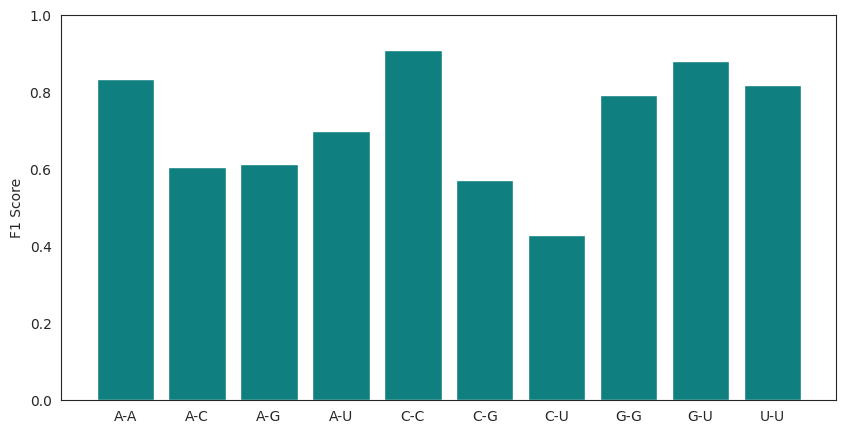

In [14]:
# plot values. pair in x axis, f1 in y axis, scale 0-1
plt.figure(figsize=(10, 5))
plt.bar(df["pair"], df_all["f1_grapha"], color="#107F80")
# plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel('F1 Score')
# save plot in high res
plt.savefig("f1_score.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
plt.clf()

<Figure size 640x480 with 0 Axes>

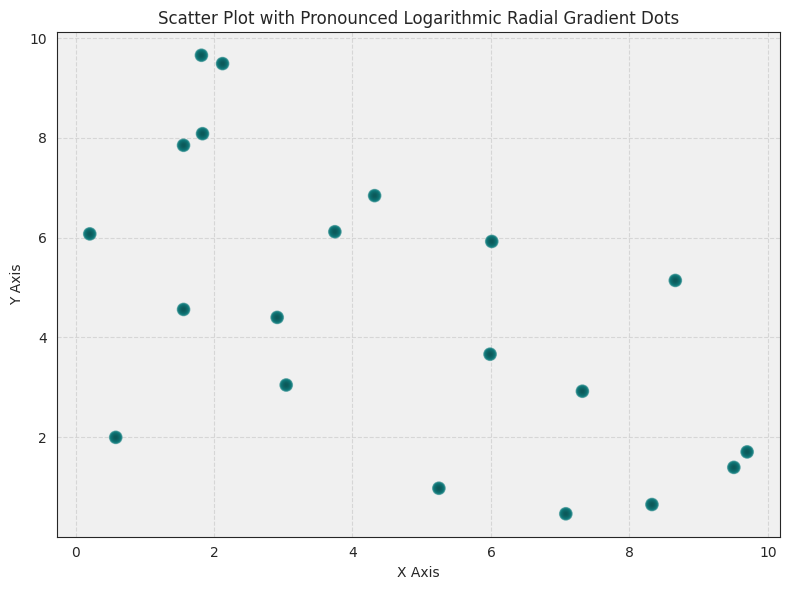

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def radial_gradient(x, y, base_color, ax, base_sizes):
    rgb = mcolors.to_rgb(base_color)

    # Create gradient effect with logarithmic fading
    num_layers = 50  # More layers for smoother gradient
    for i in range(num_layers):
        # Normalize layer index to [0, 1]
        t = i / (num_layers - 1)

        # Logarithmic decay for size (outer layers larger, inner smaller)
        layer_size = base_sizes * (1 - np.log1p(t * 10) / np.log1p(10))  # Steeper log decay
        # Logarithmic alpha (outer layers faint, inner layers solid)
        layer_alpha = 0.05 + 0.3 * (1 - np.log1p(t * 8) / np.log1p(8))  # Stronger contrast

        # Slight color variation (darker to lighter within same hue)
        color_intensity = 0.7 + 0.3 * (1 - t)  # Brighter center, darker edges
        layer_color = [c * color_intensity for c in rgb]

        # Plot layer
        ax.scatter(x, y, s=layer_size, c=[layer_color], alpha=layer_alpha, edgecolors='none')

# Generate sample data
np.random.seed(42)
n = 20
x = np.random.rand(n) * 10  # x-coordinates
y = np.random.rand(n) * 10  # y-coordinates
# base_sizes = np.random.rand(n) * 500  # Larger base size for visible gradients
base_sizes = 100

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the base color
base_color = "#107F80"
# Convert base color to RGB for slight intensity variation
radial_gradient(x, y, base_color, ax, base_sizes)

# Customize plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Scatter Plot with Pronounced Logarithmic Radial Gradient Dots')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor('#f0f0f0')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [10]:
rgb

(0.11764705882352941, 0.5647058823529412, 1.0)